In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
submission = pd.read_csv("sample_submission.csv")

In [3]:
train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [4]:
train.shape,test.shape

((6368, 15), (3430, 14))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6363 non-null   float64
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6330 non-null   float64
 10  charges_1         6170 non-null   float64
 11  charges_2 (%)     6163 non-null   float64
 12  Minimum_price     6330 non-null   float64
 13  Maximum_price     6025 non-null   float64
 14  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 746.4+ KB


In [6]:
train=train.dropna(subset=['Selling_Price'])

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6327 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6327 non-null   object 
 1   Stall_no          6322 non-null   float64
 2   instock_date      6327 non-null   object 
 3   Market_Category   6327 non-null   int64  
 4   Customer_name     6120 non-null   object 
 5   Loyalty_customer  6327 non-null   object 
 6   Product_Category  6327 non-null   object 
 7   Grade             6327 non-null   int64  
 8   Demand            6327 non-null   int64  
 9   Discount_avail    6290 non-null   float64
 10  charges_1         6129 non-null   float64
 11  charges_2 (%)     6123 non-null   float64
 12  Minimum_price     6289 non-null   float64
 13  Maximum_price     5986 non-null   float64
 14  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 790.9+ KB


In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Stall_no,6322.0,25.312243,14.331376,1.00,13.00000,25.00000,37.000000,50.000000
Market_Category,6327.0,199.100205,170.306880,0.00,55.00000,131.00000,403.000000,471.000000
Grade,6327.0,0.644065,1.025477,0.00,0.00000,0.00000,2.000000,3.000000
Demand,6327.0,50.922554,29.090574,1.00,26.00000,51.00000,76.000000,100.000000
Discount_avail,6290.0,0.140064,0.347081,0.00,0.00000,0.00000,0.000000,1.000000
charges_1,6129.0,264.657203,124.530510,100.00,163.00000,253.00000,315.000000,649.000000
charges_2 (%),6123.0,10.152866,4.317195,1.00,7.00000,10.00000,14.000000,17.000000
Minimum_price,6289.0,3533.844490,2193.700577,1.00,1882.00000,3164.00000,4697.000000,17580.000000
Maximum_price,5986.0,6436.084698,3717.051208,404.00,3922.25000,5638.50000,8126.750000,58812.000000
Selling_Price,6327.0,4563.242592,2979.102408,-6062.47,2450.00528,4210.38464,6167.643252,22638.325941


<AxesSubplot:>

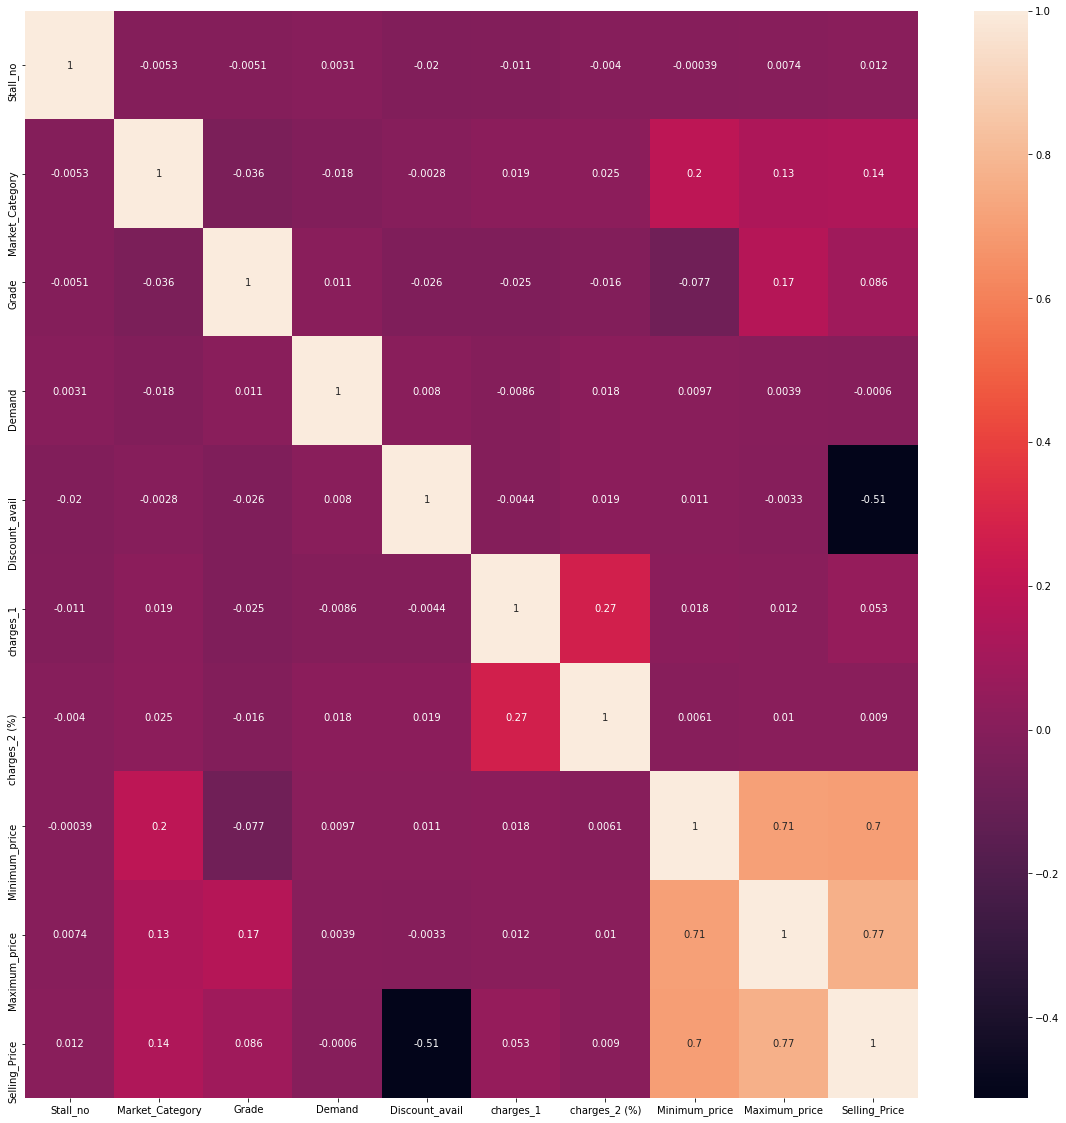

In [9]:
plt.figure(figsize=(20, 20))
sns.heatmap(train.corr(), annot=True)

In [10]:
train.duplicated().sum()

0

In [11]:
train.isna().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       207
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       37
charges_1           198
charges_2 (%)       204
Minimum_price        38
Maximum_price       341
Selling_Price         0
dtype: int64

(array([1.000e+01, 3.000e+00, 1.654e+03, 2.548e+03, 1.390e+03, 5.380e+02,
        1.480e+02, 2.100e+01, 1.300e+01, 2.000e+00]),
 array([-6062.47     , -3192.3904059,  -322.3108118,  2547.7687823,
         5417.8483764,  8287.9279705, 11158.0075646, 14028.0871587,
        16898.1667528, 19768.2463469, 22638.325941 ]),
 <BarContainer object of 10 artists>)

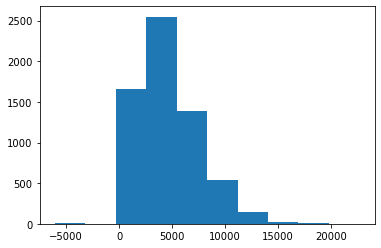

In [12]:
plt.hist(train['Selling_Price'])

C:\Users\nived\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([1.000e+00, 8.000e+00, 2.800e+01, 1.650e+02, 4.740e+02, 4.490e+02,
        1.149e+03, 2.506e+03, 1.405e+03, 1.280e+02]),
 array([ 3.61091791,  4.2525705 ,  4.89422308,  5.53587567,  6.17752825,
         6.81918084,  7.46083342,  8.10248601,  8.74413859,  9.38579117,
        10.02744376]),
 <BarContainer object of 10 artists>)

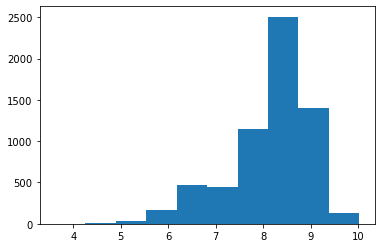

In [13]:
plt.hist(np.log1p(train['Selling_Price']))

In [14]:
train['data']="train"
test['data']="test"

full_data=pd.concat([train,test])
full_data = full_data.reset_index().drop(columns="index")

In [15]:
full_data.shape

(9757, 16)

In [16]:
category_data_columns = full_data.select_dtypes(exclude = np.number).columns
full_data[category_data_columns].apply(lambda x: x.nunique())

Product_id          9757
instock_date        7664
Customer_name       8927
Loyalty_customer       2
Product_Category      10
data                   2
dtype: int64

In [17]:
numerical_data_columns = full_data.select_dtypes(include = np.number).columns
full_data[numerical_data_columns].apply(lambda x: x.nunique())

Stall_no             50
Market_Category     275
Grade                 4
Demand              100
Discount_avail        2
charges_1           494
charges_2 (%)        17
Minimum_price      5366
Maximum_price      6309
Selling_Price      6321
dtype: int64

In [18]:
full_data.isna().sum()

Product_id             0
Stall_no               6
instock_date           0
Market_Category        0
Customer_name        260
Loyalty_customer       0
Product_Category       0
Grade                  0
Demand                 0
Discount_avail        37
charges_1            234
charges_2 (%)        209
Minimum_price         52
Maximum_price        341
Selling_Price       3430
data                   0
dtype: int64

In [19]:
test.isna().sum()

Product_id           0
Stall_no             1
instock_date         0
Market_Category      0
Customer_name       53
Loyalty_customer     0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
charges_1           36
charges_2 (%)        5
Minimum_price       14
Maximum_price        0
data                 0
dtype: int64

In [20]:
from scipy.stats import mode
full_data.pivot_table(values="Discount_avail", index = "Loyalty_customer", columns = "Product_Category", aggfunc=(lambda x: mode(x).mode[0]))

Product_Category,Child_care,Cosmetics,Educational,Fashion,Home_decor,Hospitality,Organic,Pet_care,Repair,Technology
Loyalty_customer,,,,,,,,,,
No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
from scipy.stats import mode
full_data.pivot_table(values="Discount_avail", index = "Loyalty_customer", columns = "Grade", aggfunc=(lambda x: mode(x).mode[0]))

Grade,0,1,2,3
Loyalty_customer,,,,
No,0.0,0.0,0.0,0.0
Yes,0.0,0.0,0.0,0.0


C:\Users\nived\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount_avail', ylabel='count'>

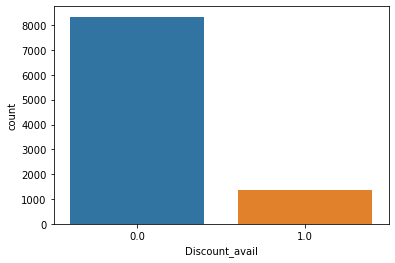

In [22]:
sns.countplot(full_data['Discount_avail'])

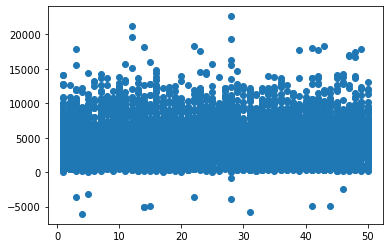

In [23]:
plt.scatter(train['Stall_no'], train['Selling_Price'])

C:\Users\nived\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stall_no', ylabel='count'>

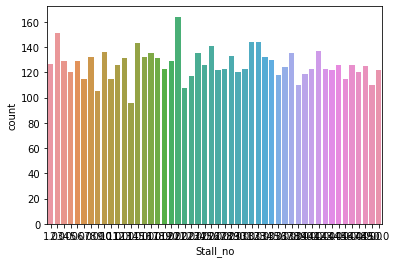

In [24]:
sns.countplot(train['Stall_no'])

In [25]:
full_data[full_data['Minimum_price'].isna()]

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,data
106,TROEGJZZFZ4QJBAW,30.0,2015-08-23 20:36:19.000,205,Emmit,Yes,Hospitality,0,9,0.0,259.0,13.0,NaN,3224.0,2939.186052,train
126,RNGEAXGWCT4VVTWR,45.0,2015-05-07 15:20:59.000,407,Gunnar,No,Home_decor,0,86,0.0,208.0,11.0,NaN,4378.0,3375.709568,train
159,MUGE5HG8G63YKHFB,16.0,2015-09-22 17:28:21.000,146,Eithan,Yes,Repair,2,68,0.0,250.0,5.0,NaN,NaN,2079.920700,train
528,MUGEAGGKPVFMRCXU,28.0,2015-09-22 15:31:31.000,451,NaN,No,Child_care,0,6,0.0,252.0,15.0,NaN,6674.0,6019.537986,train
782,BRAEBD44CXFHNAHF,44.0,2015-08-22 17:48:23.000,58,Jakari,Yes,Home_decor,0,65,0.0,241.0,16.0,NaN,NaN,5294.183400,train
1347,CNSEH4JEFRFBFYZV,8.0,2015-05-20 06:41:36.000,23,Audrina,Yes,Technology,2,15,0.0,476.0,7.0,NaN,4004.0,3417.218244,train
1367,BKPEHTGBH5GGWENP,11.0,2015-05-09 15:12:07.000,62,Everleigh,Yes,Fashion,0,4,0.0,380.0,16.0,NaN,12830.0,8331.866730,train
1622,BRAECFANXY3DJ4XT,44.0,2015-08-20 19:32:15.000,423,Ida,No,Home_decor,0,5,0.0,260.0,NaN,NaN,7070.0,5607.819162,train
1729,BRAE3TSHYZHBYFBU,1.0,2015-08-21 20:32:15.000,358,Destin,Yes,Pet_care,3,25,0.0,119.0,8.0,NaN,8351.0,5960.242050,train
1746,ACCEKFVXGGHZ9VES,1.0,2015-05-08 13:20:08.000,268,Dillon,No,Organic,2,64,0.0,129.0,8.0,NaN,4944.0,4454.495100,train


In [26]:
full_data["Minimum_price"]=full_data.groupby("Product_Category").Minimum_price.fillna(full_data.Minimum_price.median())
full_data["Maximum_price"]=full_data.groupby("Product_Category").Maximum_price.fillna(full_data.Maximum_price.median())
full_data["charges_1"]=full_data.groupby("Product_Category").charges_1.fillna(full_data.charges_1.median())
full_data["charges_2 (%)"]=full_data.groupby("Product_Category")["charges_2 (%)"].fillna(full_data.Minimum_price.median())

In [27]:
full_data["Discount_avail"]=full_data["Discount_avail"].fillna(0)

In [28]:
full_data["Stall_no"]=full_data.groupby("Product_Category").Stall_no.fillna(full_data.Stall_no.max())

In [29]:
del full_data['Customer_name']

In [30]:
del full_data['instock_date']

In [31]:
full_data["Loyalty_customer"]=full_data.Loyalty_customer.astype(str)
full_data["Discount_avail"]=full_data.Discount_avail.astype(str)

In [32]:
full_data['Selling_Price']=np.abs(full_data['Selling_Price'])

In [33]:
full_data.isna().sum()

Product_id             0
Stall_no               0
Market_Category        0
Loyalty_customer       0
Product_Category       0
Grade                  0
Demand                 0
Discount_avail         0
charges_1              0
charges_2 (%)          0
Minimum_price          0
Maximum_price          0
Selling_Price       3430
data                   0
dtype: int64

## Standard Scalar

In [34]:
category_data_columns = full_data.select_dtypes(exclude = np.number).drop(columns=["Product_id","data"]).columns

In [35]:
numeric_data_columns = full_data.select_dtypes(include = np.number).drop(columns = "Selling_Price").columns

In [36]:
scaler = StandardScaler()
preprocess_numeric_data_columns = pd.DataFrame(scaler.fit_transform(full_data[numeric_data_columns]), columns=numeric_data_columns)

In [37]:
preprocess_category_data_columns = pd.get_dummies(full_data[category_data_columns])

In [38]:
final_preprocessed = pd.concat([preprocess_category_data_columns, preprocess_numeric_data_columns, full_data[["Product_id","data", "Selling_Price"]]], axis = 1)

In [39]:
final_preprocessed

,Loyalty_customer_No,Loyalty_customer_Yes,Product_Category_Child_care,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,...,Market_Category,Grade,Demand,charges_1,charges_2 (%),Minimum_price,Maximum_price,Product_id,data,Selling_Price
0,0,1,0,0,0,1,0,0,0,0,...,-1.155956,0.336652,0.602814,0.903061,-0.146293,-0.236982,-0.449692,BRAE2NF6JA5GUEXG,train,4185.947700
1,0,1,0,0,0,1,0,0,0,0,...,-1.026374,-0.631719,0.014897,1.073360,-0.144077,1.830033,1.114280,TUNE8SFB6RJN2HSD,train,9271.490256
2,0,1,1,0,0,0,0,0,0,0,...,1.465136,-0.631719,-1.403020,-0.118736,-0.150723,1.031538,0.270306,BRAEAR7WZPQGPBZU,train,6785.701362
3,0,1,0,0,1,0,0,0,0,0,...,-1.032264,1.305023,-0.088853,-0.978343,-0.141862,0.728266,4.015907,WATDZ2ZQ8JPDHCTJ,train,13028.917824
4,0,1,0,0,0,0,0,0,0,0,...,-0.796660,0.336652,-0.538436,-0.435006,-0.161800,-0.490320,0.811692,JWSEBUKYQPMBZ3RK,train,906.553935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9752,0,1,0,0,0,0,0,0,0,1,...,-0.826111,-0.631719,-0.400103,-1.197299,-0.159584,-0.186131,-0.460509,BBAE9K7BXFUTDNBK,test,NaN
9753,0,1,0,0,0,0,0,0,0,0,...,0.940917,2.273394,-1.160936,1.981624,-0.157369,-0.053278,2.155171,RTRDYPA4PJHCJCGF,test,NaN
9754,0,1,0,0,1,0,0,0,0,0,...,-0.543386,-0.631719,-0.503853,-0.929686,-0.133001,-1.278278,1.264603,TUNE8FWQBS7TVVT7,test,NaN
9755,0,1,1,0,0,0,0,0,0,0,...,-0.555167,-0.631719,0.429898,0.489476,-0.137432,-0.926903,-0.324331,NKCEGMUABCRGUZPE,test,NaN


In [40]:
train_df=final_preprocessed[final_preprocessed["data"]=="train"]
test_df=final_preprocessed[final_preprocessed["data"]=="test"]

In [41]:
train_X = train_df.drop(columns=[ "Product_id","data", "Selling_Price"])
train_y = np.abs(train_df['Selling_Price'])
test_X = test_df.drop(columns=["Product_id","data","Selling_Price"])


In [42]:
sample_submission = pd.read_csv("Test.csv",usecols=["Product_id"])
def model_fit(model, train_X, train_y, test_X, filename):
    model.fit(train_X, train_y)
    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    print("Train RMSE : ",mean_squared_error(train_y, train_pred, squared=False))
    #print(type(test_pred))
    sample_submission['Selling_Price'] = np.abs(test_pred)
    sample_submission.to_csv(filename, index = False)
    return  sample_submission

In [43]:
linear_model = LinearRegression()
linear_res = model_fit(linear_model, train_X, train_y, test_X,  "linear_regression.csv" )

Train RMSE :  897.7930157607559


In [44]:
model = Ridge(alpha=0.9)
linear_res = model_fit(model, train_X, train_y, test_X,  "Ridge.csv" )

Train RMSE :  897.7652126488609


In [45]:
model = Lasso(alpha=0.5)
linear_res = model_fit(model, train_X, train_y, test_X,  "Lasso.csv" )

Train RMSE :  897.8167545322179


In [46]:
model = ElasticNet(alpha=0.1)
linear_res = model_fit(model, train_X, train_y, test_X, "elastic_net.csv" )

Train RMSE :  939.1280557218723


In [47]:
res = []
for i in range(1,25):
    model = KNeighborsRegressor(n_neighbors=i)
    print(i)
    err = model_fit(model, train_X, train_y, test_X,  str(i)+"KNN.csv")
    res.append(err)

1
Train RMSE :  0.0
2
Train RMSE :  664.3541282941053
3
Train RMSE :  798.3613294660221
4
Train RMSE :  883.2925183397223
5
Train RMSE :  940.3269232140032
6
Train RMSE :  982.0588906232388
7
Train RMSE :  1009.473552479559
8
Train RMSE :  1036.2220705783375
9
Train RMSE :  1060.604849016436
10
Train RMSE :  1076.0978654800836
11
Train RMSE :  1093.5610126713061
12
Train RMSE :  1110.0580382798055
13
Train RMSE :  1126.8819632655282
14
Train RMSE :  1140.5054558182107
15
Train RMSE :  1151.9285098541889
16
Train RMSE :  1160.6337969224558
17
Train RMSE :  1172.8167729400209
18
Train RMSE :  1180.4045597756128
19
Train RMSE :  1188.6844287130718
20
Train RMSE :  1196.9892227417429
21
Train RMSE :  1206.7533692019683
22
Train RMSE :  1214.1070064518692
23
Train RMSE :  1221.8660595814933
24
Train RMSE :  1230.5679888669283


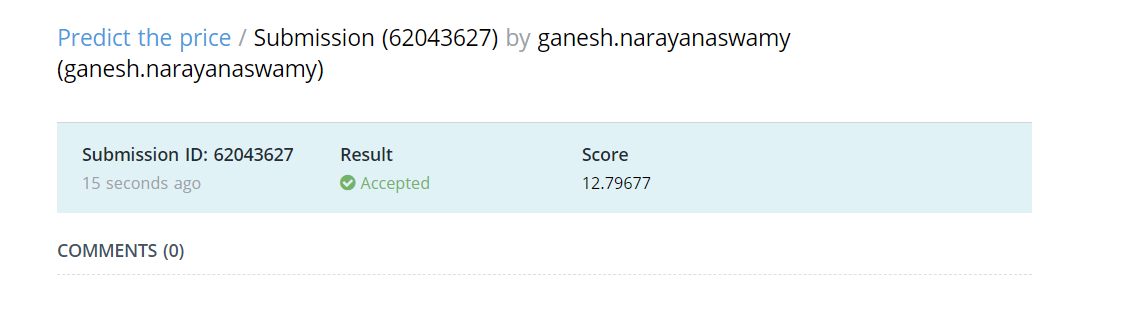

In [48]:
from IPython.display import Image
Image(filename='Score.PNG')